### Artifical Neural Network: Heart disease prediction
#### Binary Classification
1. Importing libraries, tools and data
2. Exploratory data analysis
3. Visualizations: univariate, bivariate, target analysis
4. Data preprocessing: feature scaling, reducing dimensions, deal with categorical features
5. Building an ANN object (model, 2 hidden layers) to performe a binary classification to predict heart disease mortality, using heart failure clinical records data set (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data) 
6. Making prediction and evaluating the model with ROC, loss/validation loss, accuracy/validation accuracy plots and classification report
7. Building an ANN object (model2, 1 hidden layer) with less layers, to limit overfitting and improve accuracy - Making prediction and evaluating the model with ROC, loss/validation loss, accuracy/validation accuracy plots and classification report
8. Building a single perceptron (model3) - Making prediction and evaluating the model with ROC, loss/validation loss, accuracy/validation accuracy plots and classification report
9. Building SVM models - Making prediction and evaluating the model with ROC, loss/validation loss, accuracy/validation accuracy plots and classification report
10. Comparing the models by confusion matrix
11. Comparing the models by accuracy, recall, precision, f1_score

#### 1. Importing libraries, tools and data

In [179]:

# Libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries and modules for Machine Learning
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Libraries for the ANN object
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

# Libraries and modules for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix

# Ignoring warnings for future code changes
import warnings
warnings.filterwarnings("ignore")

In [180]:
# Importing data set using Pandas
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Creating 2 back_up copies of the data set
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)

# To do: exploring different ways of importing and save data

#### 2. Exploratory Data Analysis

The data set has 13 columns and 299 entries, no null values and no categorical features

In [4]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
(299, 13)


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


* The target is DEATH_EVENT, 1 represent the death event happening, 0 not happening. 
* anaemia, diabetes, high_blood_pressure, sex, smoking are binary features.

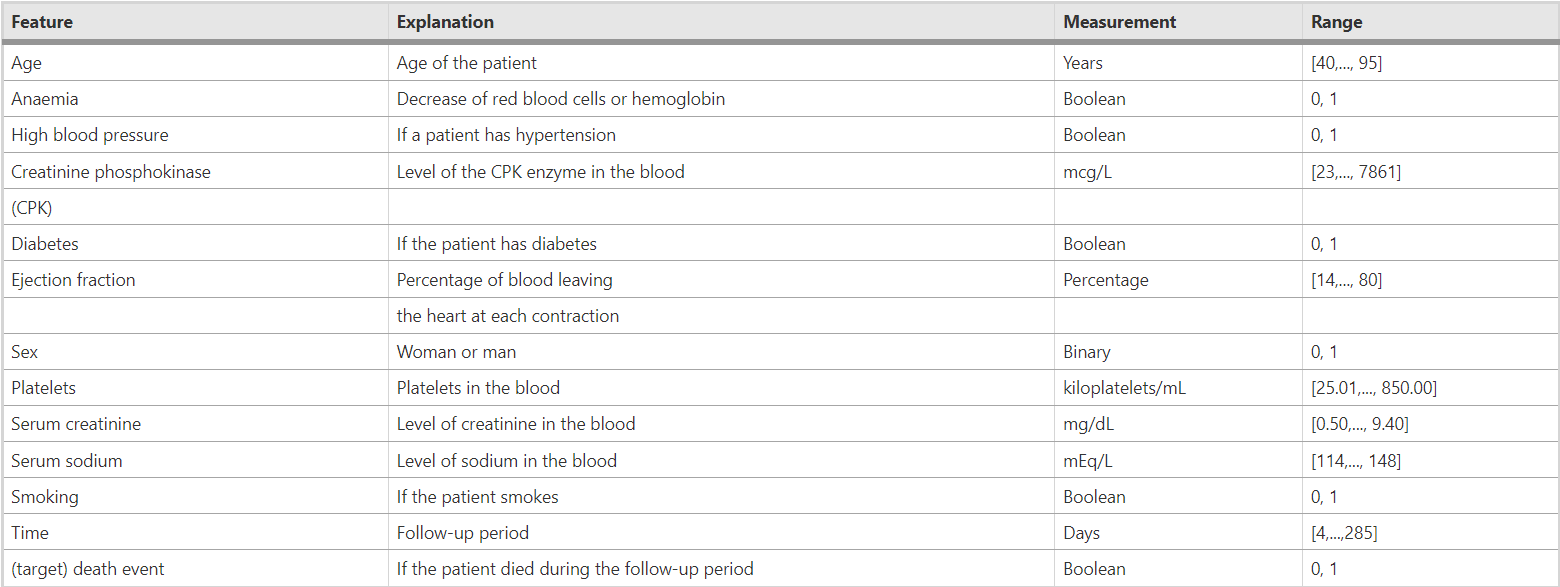

age - age of the person <br/>
anaemia - presence or absence of anaemia (0 - No Anaemia, 1 - Aneamic) <br/>
creatinine_phosphokinase - concentration of the CPK enzyme in the blood (mcg/L) <br/>
diabetes - presence or absence of diabetes condition (0 - Not Diabetic, 1 - Diabetic) <br/>
ejection_fraction - percentage of blood heart pumps at each heartbeat (%) <br/>
high_blood_pressue - presence or absence of high blood pressure condition (0 - No High BP condition, 1 - High BP Patient) <br/>
platelets - platelets counts in the blood (1000 platelets/mL) <br/>
serum_creatinine - concentration of creatinine in the blood serum (mg/dL) <br/>
serum_sodium - concentrtaion of sodium in the blood serum (mEq/L) <br/>
sex - gender of the patient (0 - Female, 1 - Male) <br/>
smoking - smoker or non-smoker (0 - Non smoker, 1 - Smoker) <br/>
time - follow-up period (days) <br/>
DEATH_EVENT - if the patient deceased during the follow-up period <br/>

#### 3. Visualisation

* UNIVARIATE ANALYSIS<br/>

    Patients population: percentage of females and males<br/>
    Death events: count and percentage<br/>
    Death events by gender<br/>
    Death probability by gender<br/>
    Age distribution<br/>
    Histograms for each feature
    Stripplots for continuous features by sex to check outliers<br/>
    
* MULTIVARIATE ANALYSIS<br/>

    Boxplots to visualize death events versus continuous features<br/>
    Barplots to visualize death events versous binary features<br/>
    Correlation matrix and heatmap<br/>
    Pairplot<br/>

In [6]:
# Identifying binary and continuous features
columns = df.columns
columns_continuous = ['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'
       ]
columns_binary = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

# Putting them in a data frame for eventual use
df_cols_continuous = pd.DataFrame(columns_continuous)
df_cols_binary = pd.DataFrame(columns_binary)

UNIVARIATE ANALYSIS

sex
1    0.65
0    0.35
Name: proportion, dtype: float64
sex
1    194
0    105
Name: count, dtype: int64


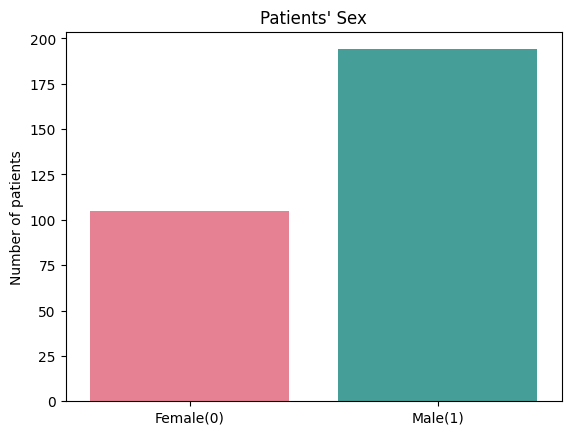

In [7]:
# Checking proportions of male anf female in the data set
print(round(df['sex'].value_counts(normalize=True),2))
print(df['sex'].value_counts())

# Plotting the count
sns.countplot(x='sex', data=df, palette = 'husl')
plt.title("Patients' Sex")
plt.xticks(ticks=np.arange(0,2,1), labels=['Female(0)', 'Male(1)'])
plt.xlabel('')
plt.ylabel('Number of patients')
plt.show()

In [8]:
#Checking the mean of the continuous feature by sex
df.groupby(['sex'])[['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']].mean()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
sex,,,,,,,
0,59.777781,476.780952,40.466667,279964.021619,1.384095,136.790476,131.904762
1,61.405500,638.701031,36.793814,254370.249897,1.399175,136.536082,129.371134


In [9]:
# Exploring the target 'DEATH_EVENT'
# Counting death events and percetage of death events amog the dataset's patients
print(round(df["DEATH_EVENT"].value_counts(normalize=True),2))
print(df['DEATH_EVENT'].value_counts())

DEATH_EVENT
0    0.68
1    0.32
Name: proportion, dtype: float64
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


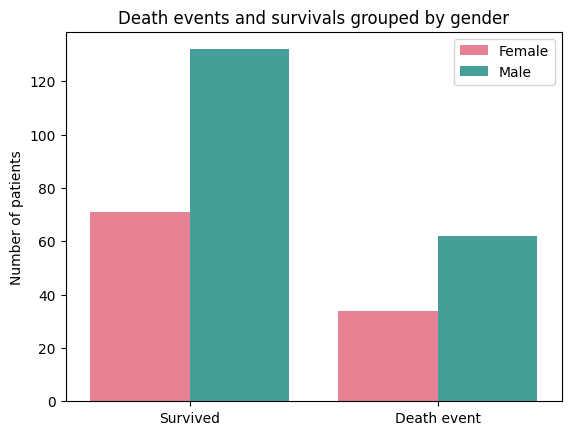

In [10]:
#Plot the count of survivals and death events using sex dimension
sns.countplot(x='DEATH_EVENT', data=df, hue='sex', palette='husl')
plt.legend(labels=["Female","Male"])
plt.title('Death events and survivals grouped by gender')
plt.xlabel('')
plt.ylabel('Number of patients')
plt.xticks(ticks=np.arange(0,2,1), labels=["Survived", "Death event"])
plt.show()

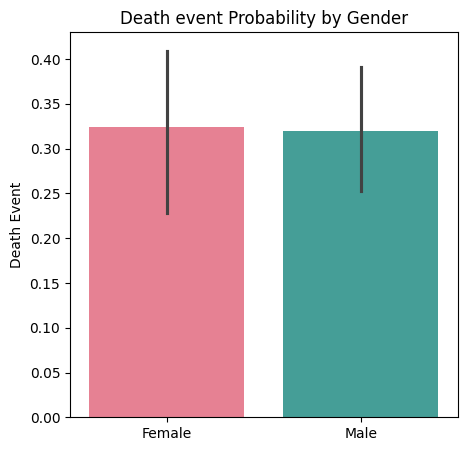

In [11]:
# Plot 'DEATH_EVENT' probability by gender
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x = 'sex', y ='DEATH_EVENT', data = df, palette = "husl")
plt.ylabel('Death Event')
plt.xlabel('')
plt.xticks(ticks=np.arange(0,2,1), labels=["Female", "Male"])
plt.title('Death event Probability by Gender')
plt.show()

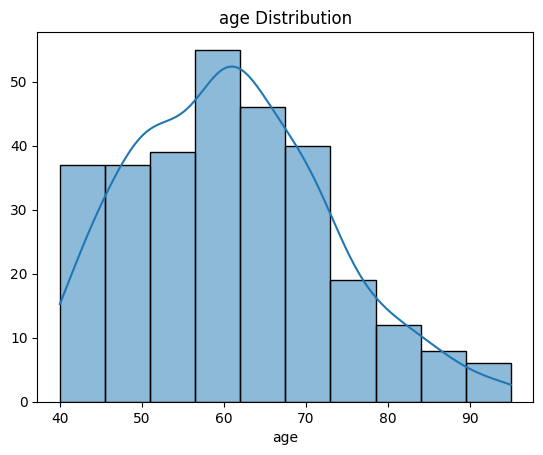

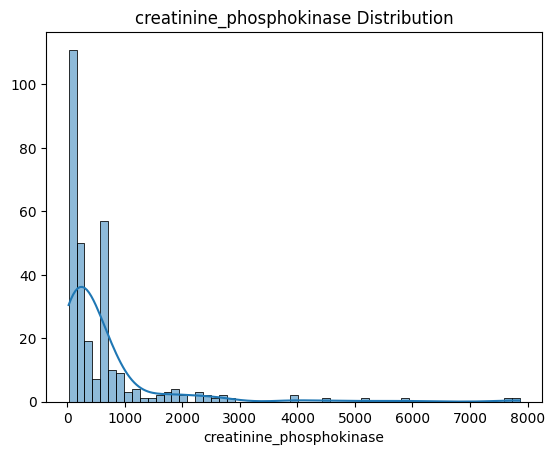

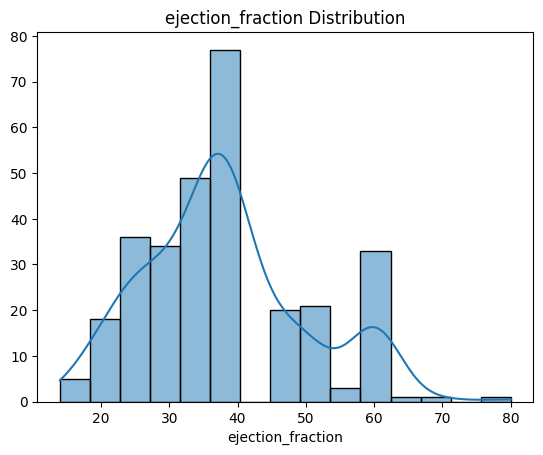

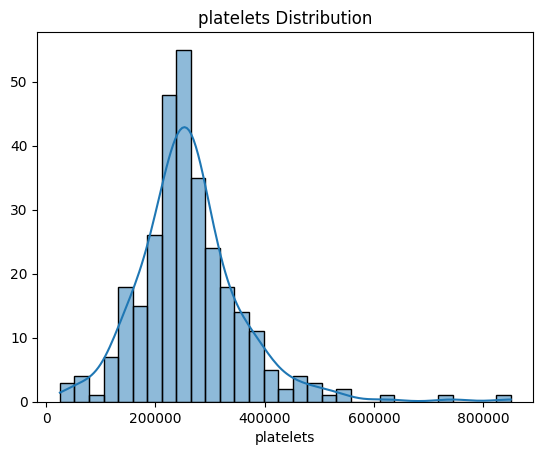

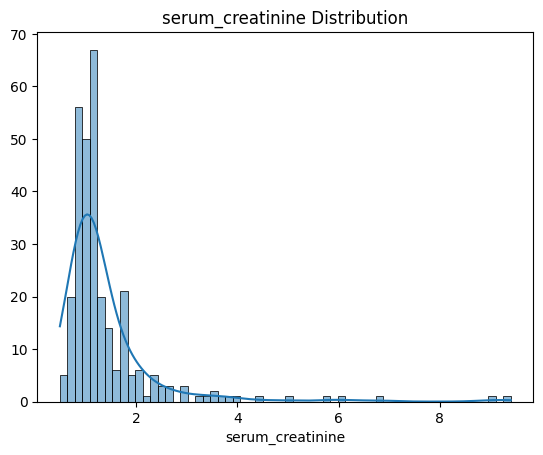

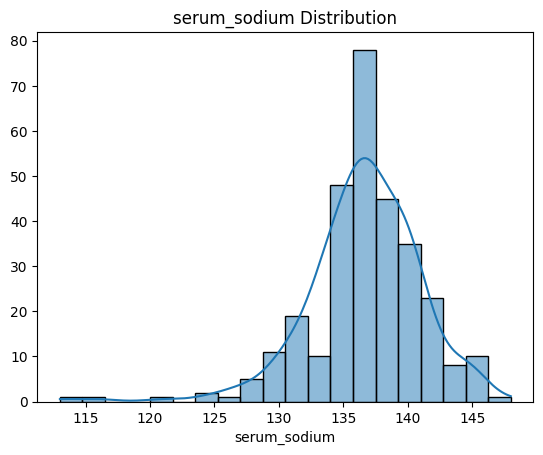

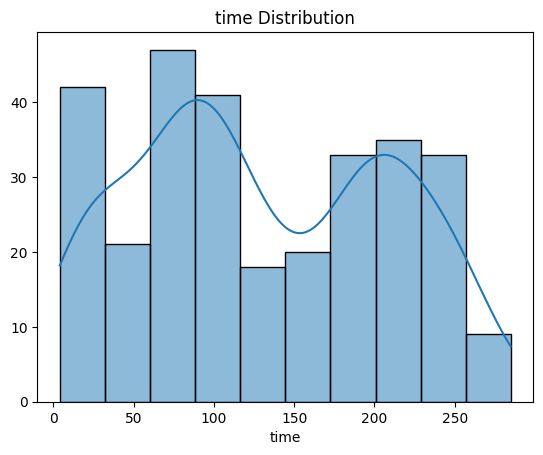

In [12]:
# Plotting histogram for each continuous feature
titles = ['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'
       ]
for i in columns_continuous:
# initialize a new plot for every iteration, otherwise it will just plot over
    plt.figure()
    sns.histplot(df[i], kde=True, palette='husl')
    auto_xlabel = plt.gca().get_xlabel()
    plt.title(f'{auto_xlabel} Distribution')
    plt.ylabel('')
plt.show()


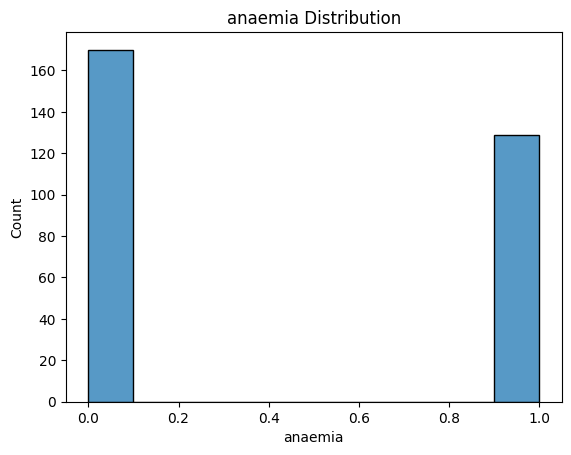

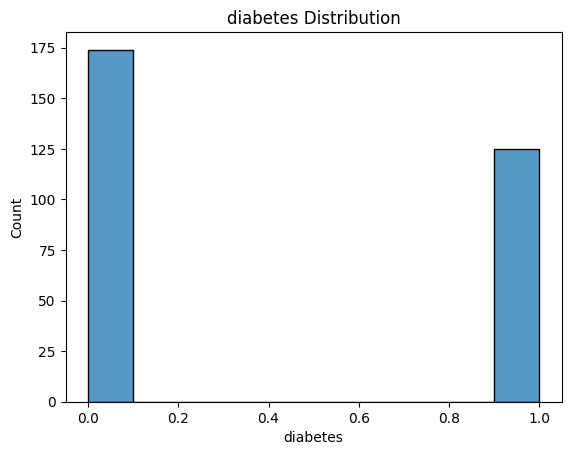

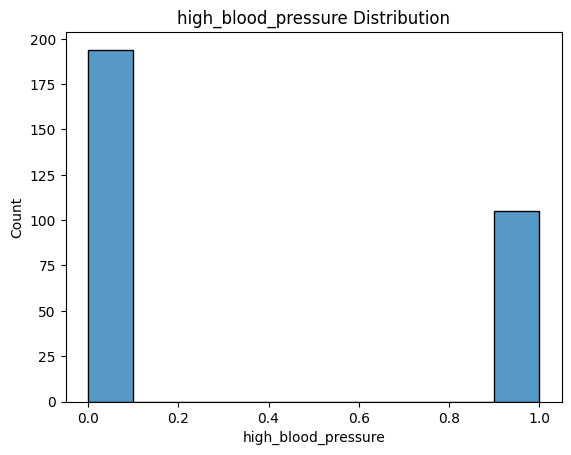

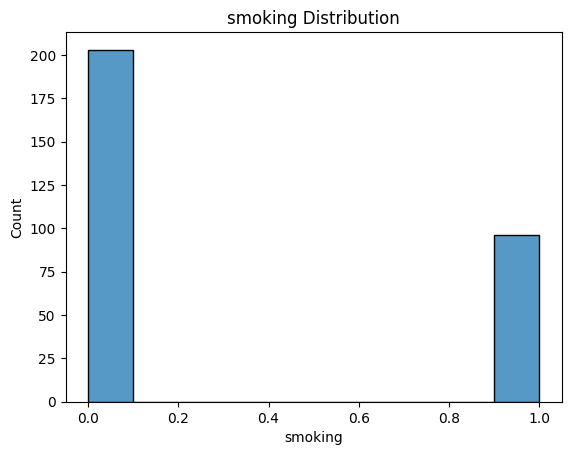

In [13]:
# Plotting histogram for each binary feature
for i in columns_binary:
    #initialize a new plot for every iteration, otherwise it will just plot over
    plt.figure()
    sns.histplot(df[i], palette='husl')
    auto_xlabel = plt.gca().get_xlabel()
    plt.title(f'{auto_xlabel} Distribution')
    plt.show()


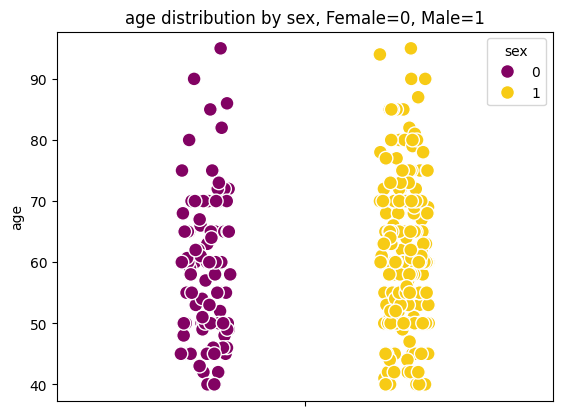

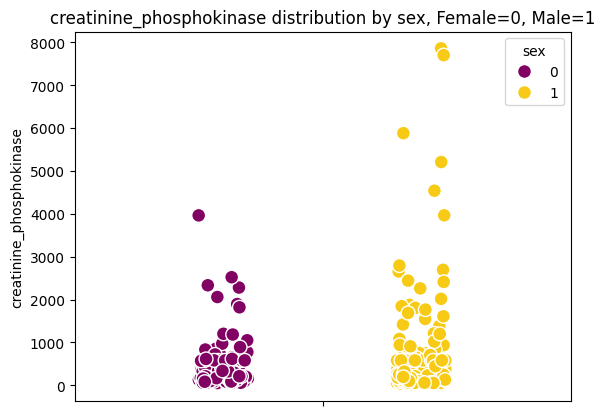

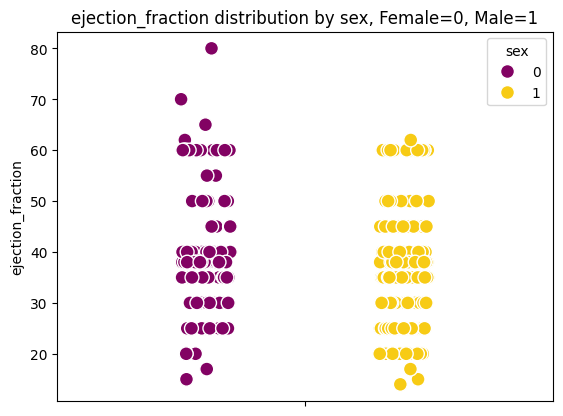

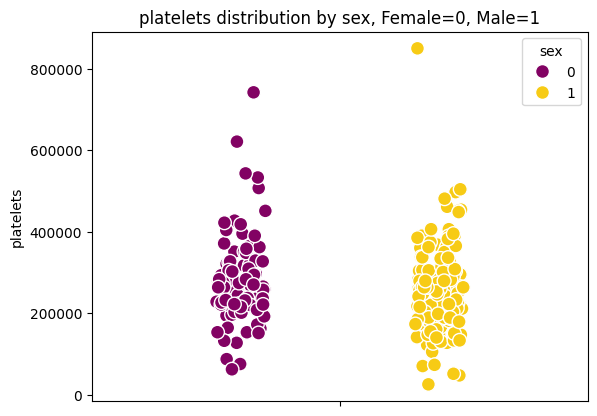

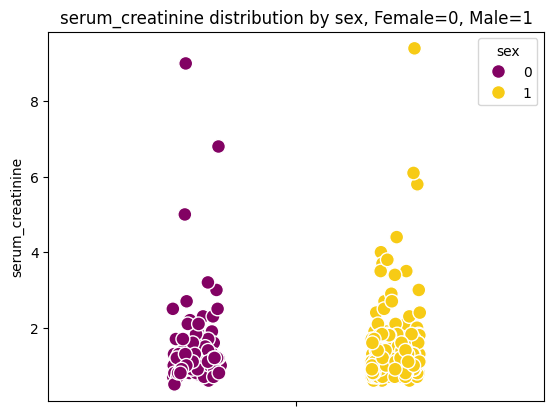

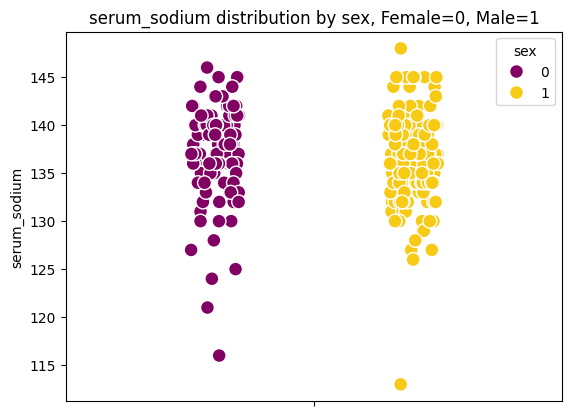

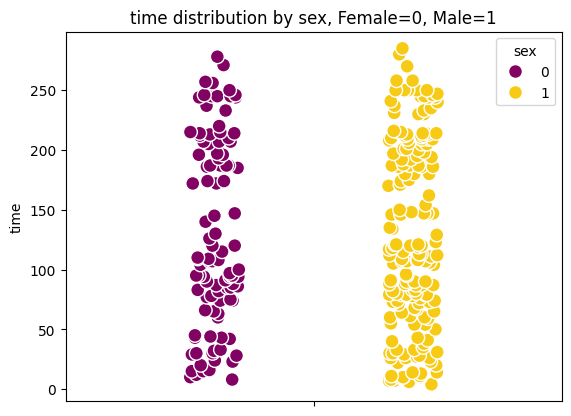

In [14]:
for i in columns_continuous:
    plt.figure()
    sns.set_palette(['#820263','#F7CB15','#D3511D', '#70A9A1', '#28536B', 'green'])
    sns.stripplot(data=df, y=df[i], hue=df['sex'], edgecolor='white', linewidth=1, size=10, jitter=True, dodge=True)
    auto_ylabel = plt.gca().get_ylabel()
    plt.title(f'{auto_ylabel} distribution by sex, Female=0, Male=1')
    plt.xlabel('')
    plt.show()

MULTIVARIATE ANALYSIS

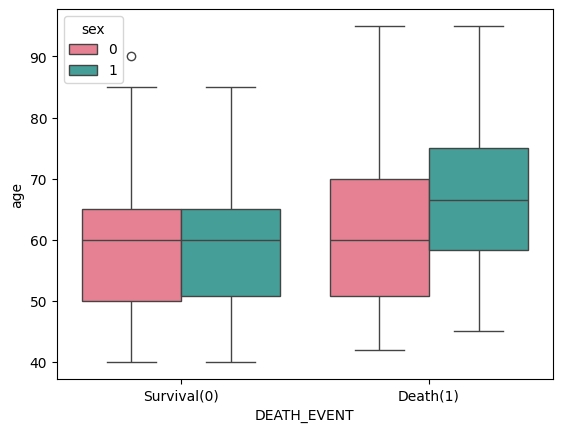

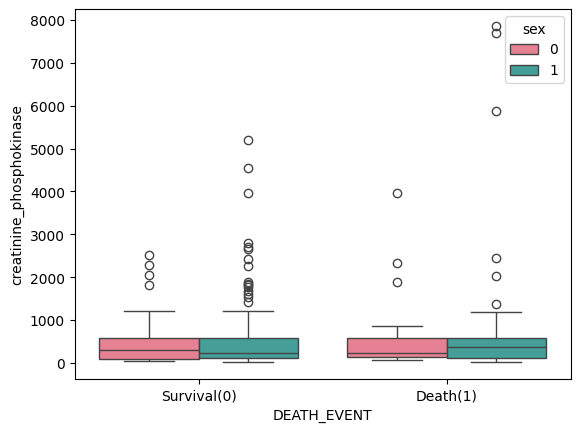

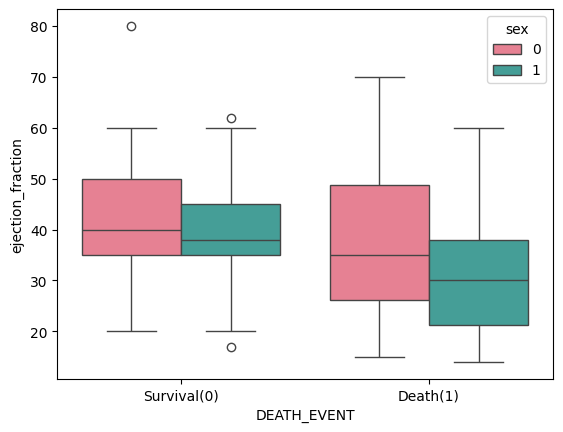

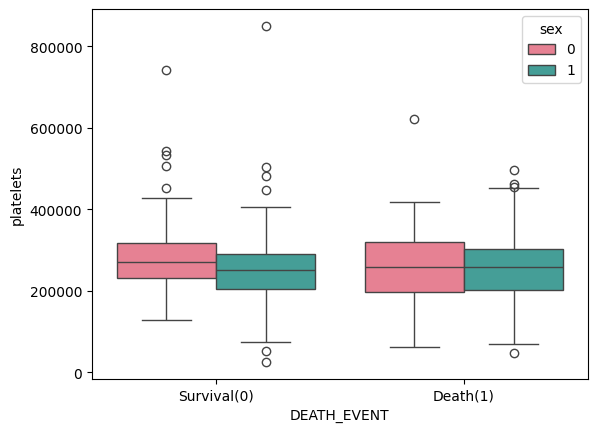

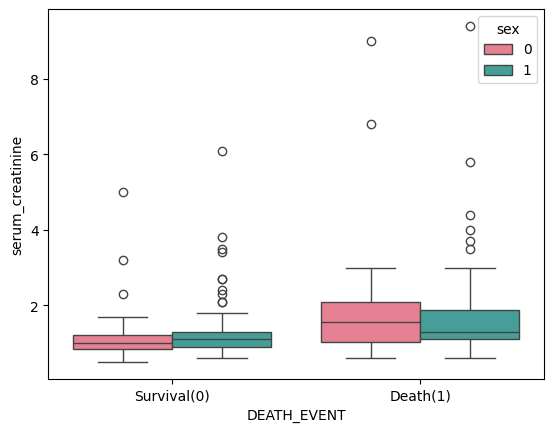

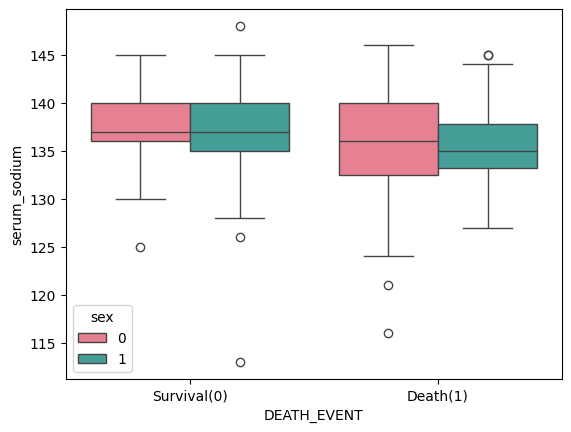

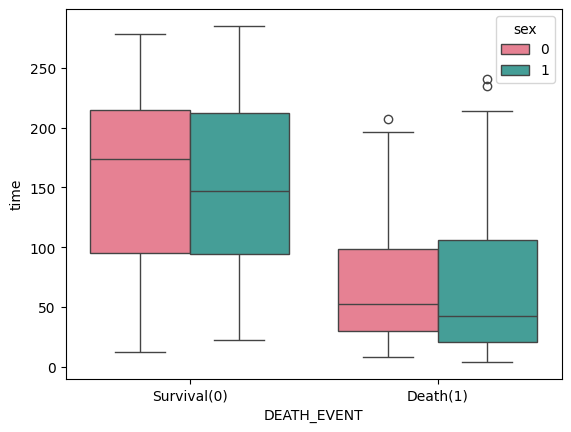

In [ ]:
# Using boxplot() to visualize the DEATH EVENT versus the continuous feature
# Using a for loop to create all the plots

for i in columns_continuous:
    plt.figure()
    sns.boxplot(data=df, x=df['DEATH_EVENT'], y=df[i], hue=df['sex'], palette='husl')
    plt.xticks(ticks=np.arange(0,2,1), labels=['Survival(0)', 'Death(1)'])
    legend_handles, _ = ax.get_legend_handles_labels()
    ax.legend(legend_handles, ['Female','Male'])
    plt.show()

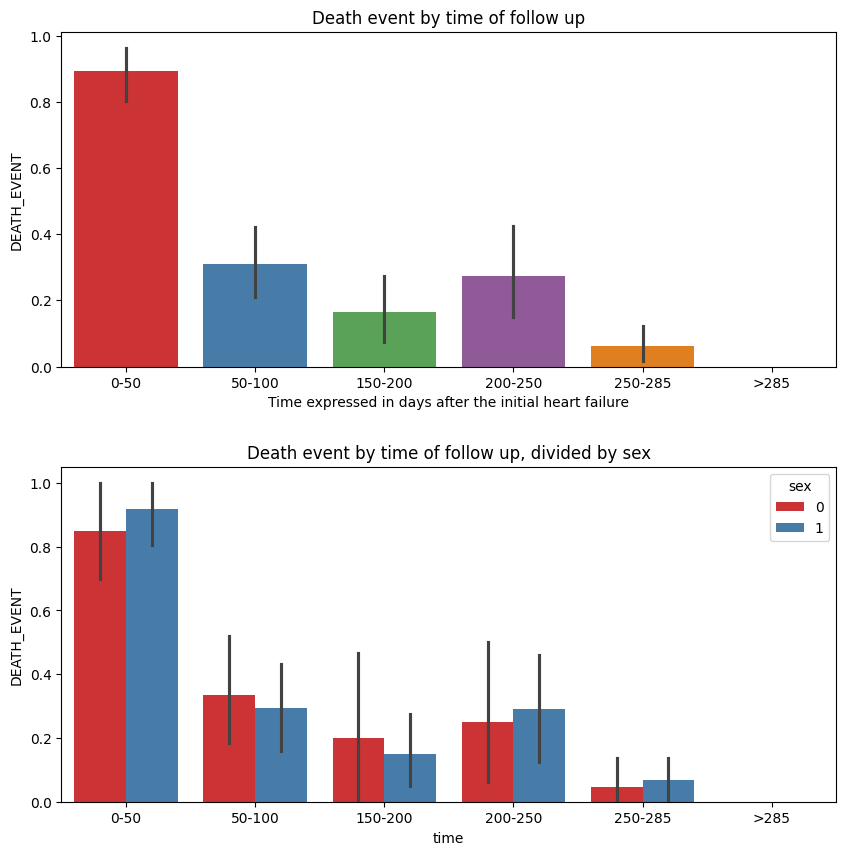

In [ ]:
# plotting 'time' further as bar plot, we get useful information because it is a categorized features

number_rows = 2
number_colums = 1
fig = plt.figure(figsize=(10,10))
ax= fig.subplots(number_rows, number_colums)

plt.subplot(211)
sns.barplot(x = 'time', y = 'DEATH_EVENT',  data = df, palette='Set1')
plt.title('Death event by time of follow up')
plt.xlabel('Time expressed in days after the initial heart failure')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0-50', '50-100', '150-200', '200-250', '250-285', '>285'])

plt.subplot(212)
sns.barplot(x = 'time', y = 'DEATH_EVENT', hue='sex', data = df, palette='Set1')
plt.title('Death event by time of follow up, divided by sex')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0-50', '50-100', '150-200', '200-250', '250-285', '>285'])
# plt.legend(labels=['Female', 'Male']) this is not working, reduce the colors of the categories to a line

# Add space between subplots
plt.subplots_adjust(hspace=0.3)

plt.show()

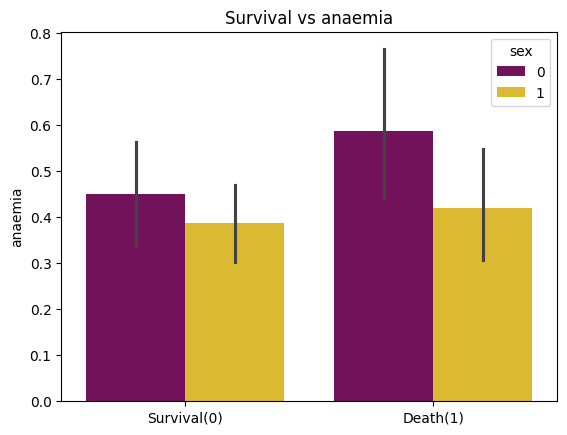

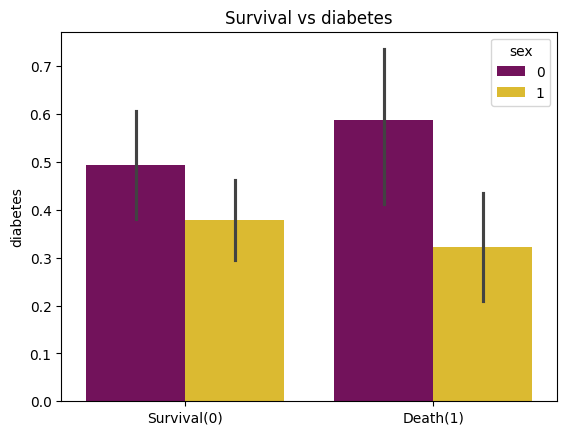

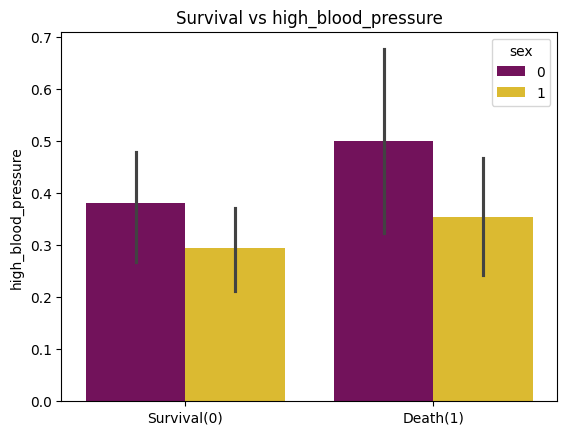

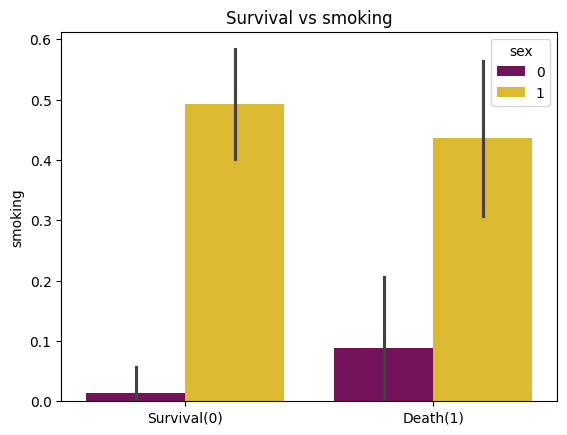

In [ ]:
# Using barplot() to visualize the DEATH EVENT versus the binary features
# Using a for loop to create all the plots
for i in columns_binary:
    plt.figure()
    sns.set_palette(['#820263','#F7CB15','#D3511D', '#70A9A1', '#28536B', 'green'])
    sns.barplot(data=df, x=df['DEATH_EVENT'], y=df[i], hue=df['sex'])
    legend_handles, _ = ax.get_legend_handles_labels()
    ax.legend(legend_handles, ['Female','Male'])
    plt.xticks(ticks=np.arange(0,2,1), labels=['Survival(0)', 'Death(1)'])
    auto_ylabel = plt.gca().get_ylabel()
    plt.title(f'Survival vs {auto_ylabel}')
    #plt.legend(labels=['Female', 'Male'], loc= 'upper left')
    plt.xlabel('')
    plt.show()
    

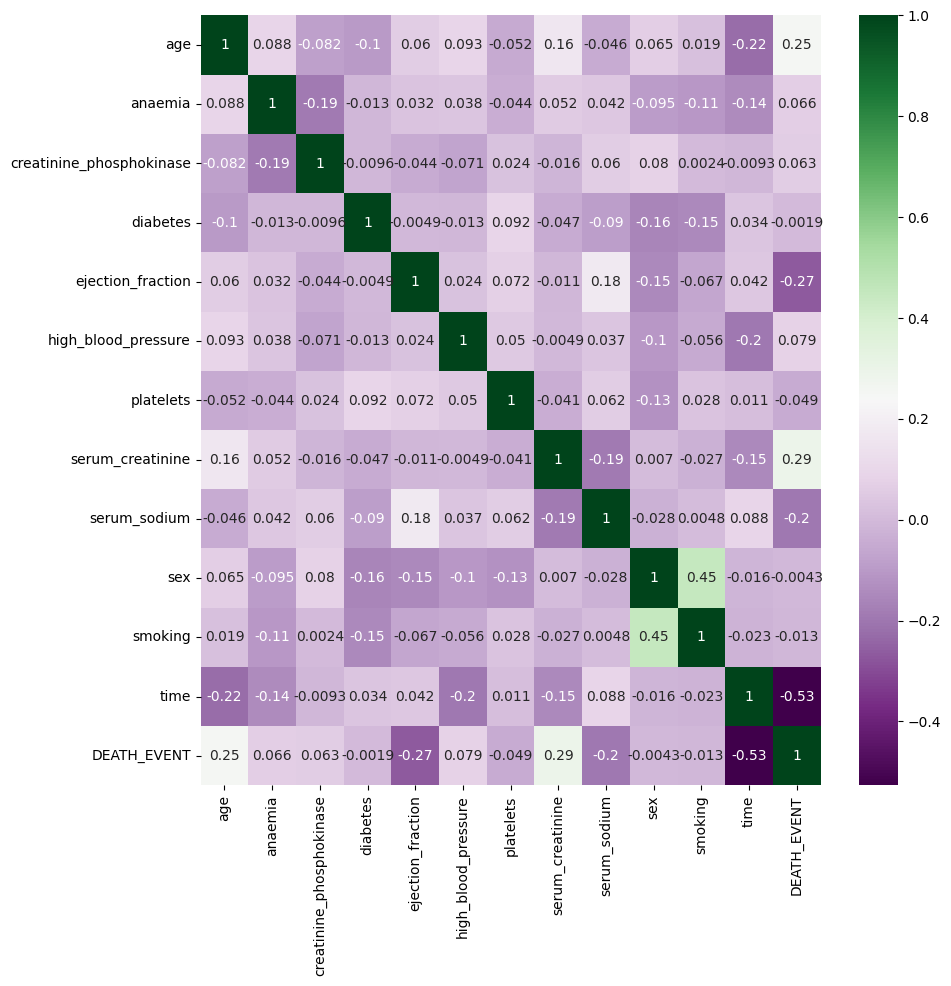

In [ ]:
# Creating a corr() map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='PRGn')
plt.show()

In [ ]:
df.head()
df3 = df.drop(columns_binary, axis=1)
df3.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
0,75.0,582,20,265000.00,1.9,130,1,4,1
1,55.0,7861,38,263358.03,1.1,136,1,6,1
2,65.0,146,20,162000.00,1.3,129,1,7,1
3,50.0,111,20,210000.00,1.9,137,1,7,1
4,65.0,160,20,327000.00,2.7,116,0,8,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


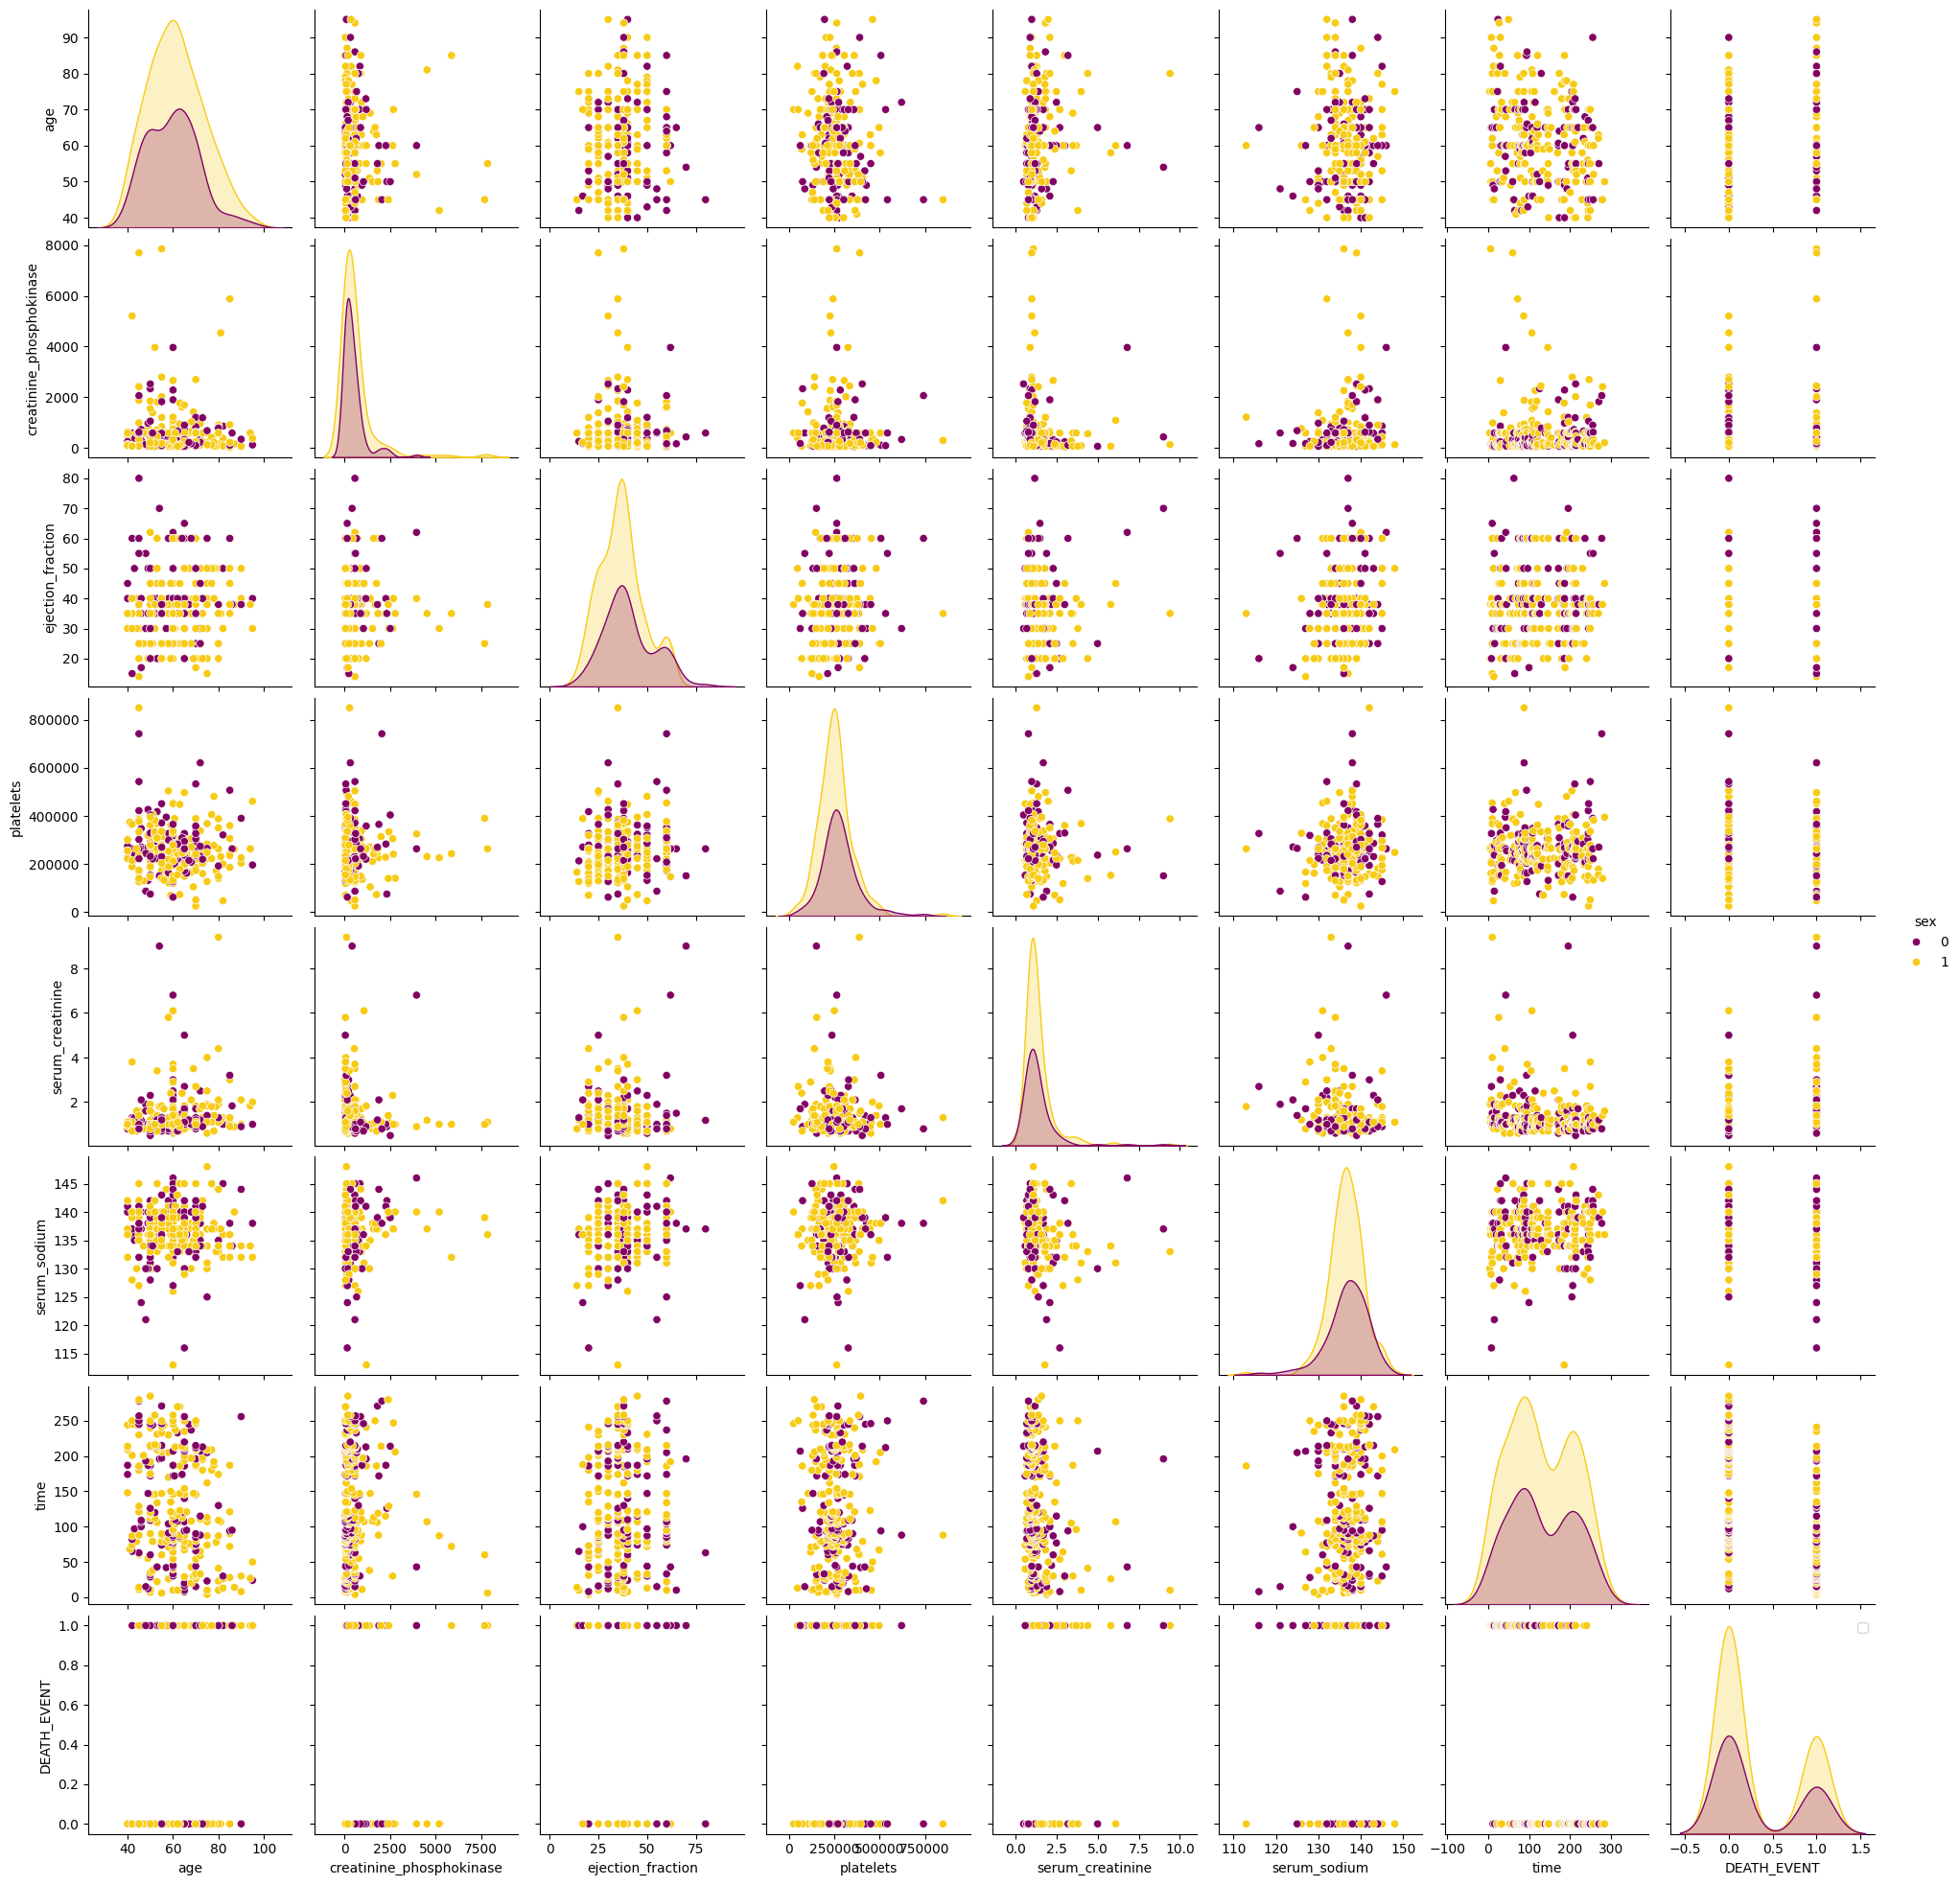

In [ ]:
sns.pairplot(df3, hue='sex')
plt.legend()
plt.show()

#### 4. Preprocessing
There are no categorical variable, no need for one hot encoding <br\>
Scaling

In [26]:
# split the data into independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [28]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 32)

In [29]:
# Checking shape of the train and test data
print("Shape of the training set: ", X_train.shape)   
print("Shape of the test set: ", X_test.shape)

Shape of the training set:  (239, 12)
Shape of the test set:  (60, 12)


In [30]:
# Standardisation of the data
# standard scaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test =scaler_x.transform(X_test)

#### 5. Building ANN model with 2 hidden layers
Starting with a 2 hidden layers ANN

In [31]:
# Initialize neural network, multi perceptron
model = Sequential()

# SET UP INPUT LAYER
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation ='relu', input_dim = 12))

# Hidden layer 1
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation ='relu'))
model.add(Dropout(0.25))

# Hidden layer 2
#model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dropout(0.50))

# OUTPUT LAYER
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation ='sigmoid'))

# COMPILING THE NETWORK
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = 'accuracy')

In [32]:
# TRAIN THE NETWORK
history = model.fit(X_train, y_train, epochs=20, validation_split=0.20)

Epoch 1/20




6/6 [==============================] - 2s 73ms/step - loss: 0.6925 - accuracy: 0.6440 - val_loss: 0.6913 - val_accuracy: 0.7500
Epoch 2/20
6/6 [==============================] - 0s 17ms/step - loss: 0.6914 - accuracy: 0.6597 - val_loss: 0.6894 - val_accuracy: 0.7500
Epoch 3/20
6/6 [==============================] - 0s 14ms/step - loss: 0.6902 - accuracy: 0.6597 - val_loss: 0.6873 - val_accuracy: 0.7500
Epoch 4/20
6/6 [==============================] - 0s 13ms/step - loss: 0.6885 - accuracy: 0.6597 - val_loss: 0.6852 - val_accuracy: 0.7500
Epoch 5/20
6/6 [==============================] - 0s 17ms/step - loss: 0.6873 - accuracy: 0.6597 - val_loss: 0.6824 - val_accuracy: 0.7500
Epoch 6/20
6/6 [==============================] - 0s 18ms/step - loss: 0.6851 - accuracy: 0.6597 - val_loss: 0.6793 - val_accuracy: 0.7500
Epoch 7/20
6/6 [==============================] - 0s 19ms/step - loss: 0.6826 - accuracy: 0.6597 - val_loss: 0.6753 - val_accuracy: 0.7500
Epoch 8/20
6/6 [======================

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                208       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# save the network
model.save('hearth.h5')

#### 6. Make predictions and evaluate

The model seems to overfit even if I used a drop our <br/>
Recall is 1 and as much as we dont want false positive, the ROC shows a model which is unable to classify, with AUC=0.5

Rough rule of thumb for AUCs and accuracy<br/>
    AUCs between 0.50 and 0.70 >> low accuracy <br/>
    AUCs between 0.70 and 0.90 >> moderate accuracy <br/>
    AUCs over 0.90 >> high accuracy <br/>

I will proceed in section 7 with building a model less complex and in section 8 I will use a perceptron. 

In [35]:
#make prediction
y_pred_ann = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [36]:
# set threshold
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

In [37]:
# flatten the y_pred to visualize it in a data frame
y_pred_ann= y_pred_ann.flatten()

In [38]:
# Comparing actual and predicted
pd.DataFrame({'Actual': y_test,'Predicted': y_pred_ann})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [39]:
# CLASSIFICATION REPORT
print(classification_report(y_test, y_pred_ann))

# PRECISION: asks the question out of all my predictions, how accurate have I been in predicting the positive class? 
# We use Precision when we need to check the accuracy of our forecast and when the forecast is being used for an action. 
# Precision= TP/(TP+FP)

# RECALL: asks the question out of all the positive cases in the sample, how many of these have been correctly identified by the algorithm. 
# Recall becomes important when we want to be comprehensive in detection of a class and where a false positive is less of a issue than classifying a positive as a negative. 
# REcall= TP/(TP+FN)

# F1 SCORE: represents a compromise between Precision and Recall. F1 scores are typically looked at when we want to compare different models which have different precision 
# and recall scores. The F1 score is the weighted harmonic mean of precision and recall scores. 
# The F1 Score is more robust to outliers. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

              precision    recall  f1-score   support

           0       0.78      0.93      0.84        41
           1       0.73      0.42      0.53        19

    accuracy                           0.77        60
   macro avg       0.75      0.67      0.69        60
weighted avg       0.76      0.77      0.75        60



AUC: 0.673941


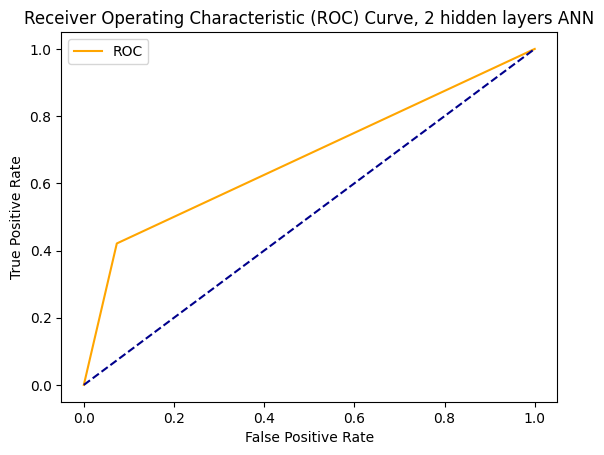

In [250]:
# ROC CURVE (RECEIVER OPERATING CHARACTERISTIC)
auc_mod2 = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc_mod2)

fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, 2 hidden layers ANN')
plt.legend()
plt.show()

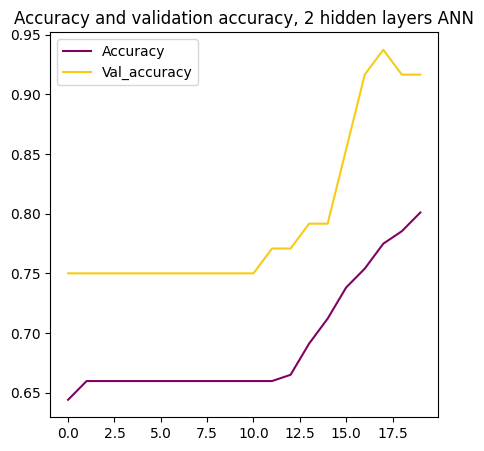

In [251]:
# Plotting accuracy and validation accuracy
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label ='Val_accuracy')
plt.title('Accuracy and validation accuracy, 2 hidden layers ANN')
plt.legend()
plt.show()


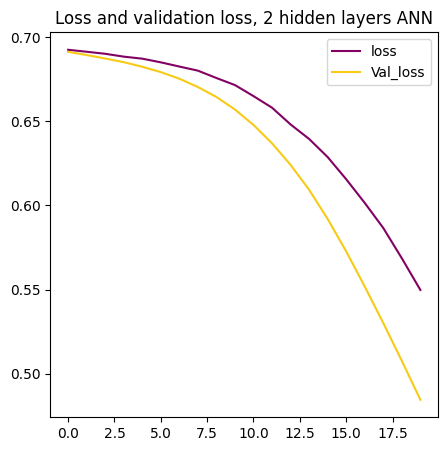

In [252]:
# Plotting loss and validation loss
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label ='Val_loss')
plt.title('Loss and validation loss, 2 hidden layers ANN')
plt.legend()
plt.show()


#### 7. Creating a ANN with less layers to avoid overfitting
Use only 1 hidden layer

In [46]:
# Initialize neural network, multi perceptron
model2 = Sequential()

# SET UP INPUT LAYER
model2.add(Dense(units = 16, kernel_initializer = 'uniform', activation ='relu', input_dim = 12))

# Hidden layer 1
model2.add(Dense(units = 8, kernel_initializer = 'uniform', activation ='relu'))
model2.add(Dropout(0.25))

# OUTPUT LAYER
model2.add(Dense(units = 1, kernel_initializer = 'uniform', activation ='sigmoid'))

# COMPILING THE NETWORK
model2.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = 'accuracy')

In [47]:
# TRAIN THE NETWORK
history2 = model2.fit(X_train, y_train, epochs=32, validation_split=0.20)

Epoch 1/32


6/6 [==============================] - 2s 64ms/step - loss: 0.6928 - accuracy: 0.6440 - val_loss: 0.6919 - val_accuracy: 0.7500
Epoch 2/32
6/6 [==============================] - 0s 17ms/step - loss: 0.6917 - accuracy: 0.6597 - val_loss: 0.6900 - val_accuracy: 0.7500
Epoch 3/32
6/6 [==============================] - 0s 15ms/step - loss: 0.6904 - accuracy: 0.6597 - val_loss: 0.6878 - val_accuracy: 0.7500
Epoch 4/32
6/6 [==============================] - 0s 16ms/step - loss: 0.6890 - accuracy: 0.6597 - val_loss: 0.6853 - val_accuracy: 0.7500
Epoch 5/32
6/6 [==============================] - 0s 17ms/step - loss: 0.6869 - accuracy: 0.6597 - val_loss: 0.6824 - val_accuracy: 0.7500
Epoch 6/32
6/6 [==============================] - 0s 15ms/step - loss: 0.6848 - accuracy: 0.6597 - val_loss: 0.6789 - val_accuracy: 0.7500
Epoch 7/32
6/6 [==============================] - 0s 15ms/step - loss: 0.6817 - accuracy: 0.6597 - val_loss: 0.6746 - val_accuracy: 0.7500
Epoch 8/32
6/6 [======================

In [48]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                208       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
# save the network
model2.save('hearth2.h5')

In [49]:
#make prediction
y_pred_ann_2 = model2.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [64]:
# CLASSIFICATION REPORT
print(classification_report(y_test, y_pred_ann_2))

              precision    recall  f1-score   support

           0       0.78      0.93      0.84        41
           1       0.73      0.42      0.53        19

    accuracy                           0.77        60
   macro avg       0.75      0.67      0.69        60
weighted avg       0.76      0.77      0.75        60



AUC: 0.673941


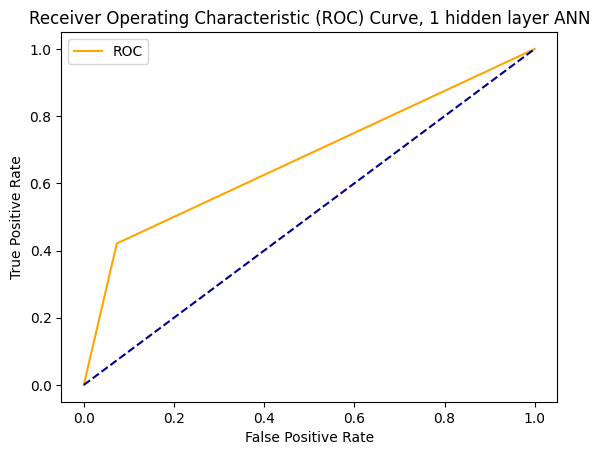

In [249]:
# ROC CURVE (RECEIVER OPERATING CHARACTERISTIC)
auc_mod2 = roc_auc_score(y_test, y_pred_ann_2)
print('AUC: %f' %auc_mod2)

fpr, tpr, _ = roc_curve(y_test, y_pred_ann_2)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, 1 hidden layer ANN')
plt.legend()
plt.show()

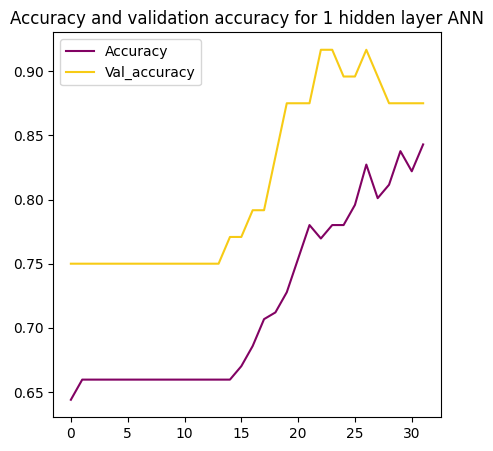

In [248]:
# Plotting accuracy and validation accuracy
plt.figure(figsize=(5,5))
plt.plot(history2.history['accuracy'], label = 'Accuracy')
plt.plot(history2.history['val_accuracy'], label ='Val_accuracy')
plt.title('Accuracy and validation accuracy for 1 hidden layer ANN')
plt.legend()
plt.show()


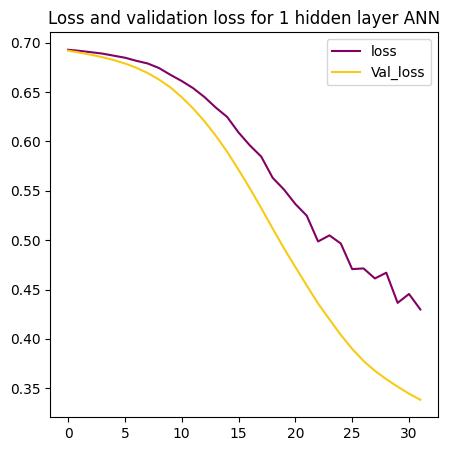

In [247]:
# Plotting loss and validation loss
plt.figure(figsize=(5,5))
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history['val_loss'], label ='Val_loss')
plt.title('Loss and validation loss for 1 hidden layer ANN')
plt.legend()
plt.show()


#### 8. Using a simple perceptron

In [57]:
# Initialize the 'Perceptron'
model3 = Sequential()

model3.add(Dense(1, input_shape=(12,), activation='sigmoid', kernel_initializer='uniform'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the perceptron using stochastic gradient descent
# with a validation split of 20%
model3.fit(X_train, y_train, epochs=225, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/225


8/8 [==============================] - 1s 41ms/step - loss: 0.6791 - accuracy: 0.6597 - val_loss: 0.6679 - val_accuracy: 0.6250
Epoch 2/225
8/8 [==============================] - 0s 11ms/step - loss: 0.6729 - accuracy: 0.7016 - val_loss: 0.6605 - val_accuracy: 0.6667
Epoch 3/225
8/8 [==============================] - 0s 10ms/step - loss: 0.6674 - accuracy: 0.7120 - val_loss: 0.6532 - val_accuracy: 0.7500
Epoch 4/225
8/8 [==============================] - 0s 11ms/step - loss: 0.6618 - accuracy: 0.7225 - val_loss: 0.6461 - val_accuracy: 0.7500
Epoch 5/225
8/8 [==============================] - 0s 10ms/step - loss: 0.6565 - accuracy: 0.7592 - val_loss: 0.6390 - val_accuracy: 0.7500
Epoch 6/225
8/8 [==============================] - 0s 12ms/step - loss: 0.6510 - accuracy: 0.7592 - val_loss: 0.6322 - val_accuracy: 0.7500
Epoch 7/225
8/8 [==============================] - 0s 13ms/step - loss: 0.6458 - accuracy: 0.7749 - val_loss: 0.6250 - val_accuracy: 0.7500
Epoch 8/225
8/8 [===============

In [58]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
# save the network
model3.save('hearth3.h5')

In [71]:
#make prediction
y_pred_ann3 = model3.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [232]:
# CLASSIFICATION REPORT
print(classification_report(y_test, y_pred_ann3))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.72      0.68      0.70        19

    accuracy                           0.82        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.81      0.82      0.82        60



In [72]:
y_pred_ann3

array([[0.1808763 ],
       [0.05861888],
       [0.04063009],
       [0.48335585],
       [0.5183039 ],
       [0.05512188],
       [0.4605362 ],
       [0.00405647],
       [0.1576918 ],
       [0.3266555 ],
       [0.13455062],
       [0.32429764],
       [0.6394394 ],
       [0.82115495],
       [0.26001158],
       [0.18195353],
       [0.34612784],
       [0.19474672],
       [0.26402882],
       [0.28359446],
       [0.6858932 ],
       [0.74979895],
       [0.2663071 ],
       [0.14395687],
       [0.45273185],
       [0.20463744],
       [0.07884351],
       [0.67059606],
       [0.39013004],
       [0.22340484],
       [0.70207256],
       [0.09236719],
       [0.8758354 ],
       [0.30903256],
       [0.78468955],
       [0.13713993],
       [0.07815628],
       [0.10437354],
       [0.07468703],
       [0.8719735 ],
       [0.6751524 ],
       [0.67055213],
       [0.07271444],
       [0.11810152],
       [0.83145195],
       [0.17665182],
       [0.84147644],
       [0.948

In [74]:
# set threshold
y_pred_ann3 = np.where(y_pred_ann3 > 0.5, 1, 0)

In [75]:
# CLASSIFICATION REPORT
print(classification_report(y_test, y_pred_ann3))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.72      0.68      0.70        19

    accuracy                           0.82        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.81      0.82      0.82        60



AUC: 0.673941


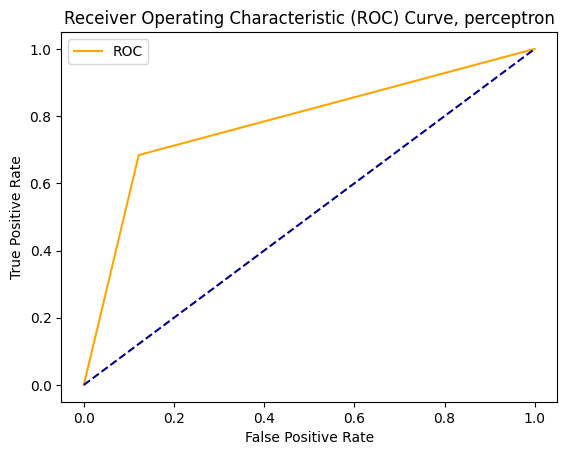

In [237]:
# ROC CURVE (RECEIVER OPERATING CHARACTERISTIC)
auc_mod3 = roc_auc_score(y_test, y_pred_ann3)
print('AUC: %f' %auc_mod2)

fpr, tpr, _ = roc_curve(y_test, y_pred_ann3)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, perceptron')
plt.legend()
plt.show()

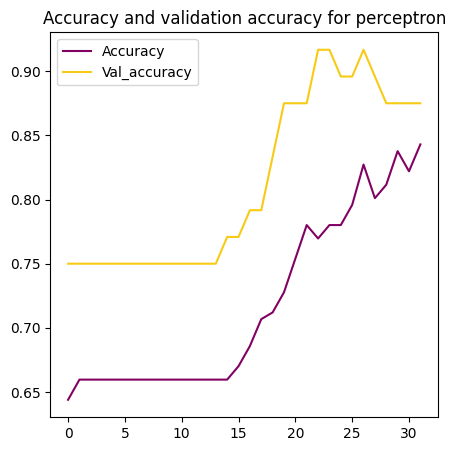

In [240]:
# Plotting accuracy and validation accuracy
plt.figure(figsize=(5,5))
plt.plot(history2.history['accuracy'], label = 'Accuracy')
plt.plot(history2.history['val_accuracy'], label ='Val_accuracy')
plt.title('Accuracy and validation accuracy for perceptron')
plt.legend()
plt.show()

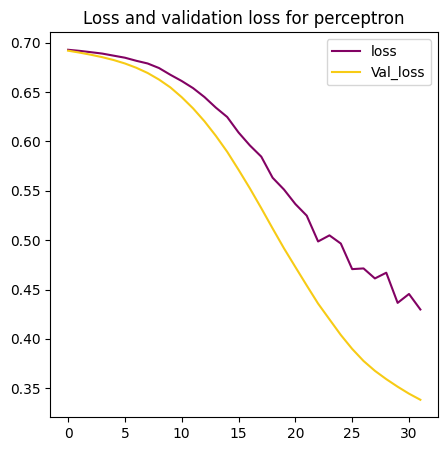

In [241]:
# Plotting loss and validation loss
plt.figure(figsize=(5,5))
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history['val_loss'], label ='Val_loss')
plt.title('Loss and validation loss for perceptron')
plt.legend()
plt.show()


#### 9. Building SVM models

In [181]:
# SUPPORT VECTOR MACHINE
# Initialize a Support Vector Machine object
clf_Linear = svm.SVC(kernel='linear')
clf_Sigmoid = svm.SVC(kernel='sigmoid')
clf_RBF = svm.SVC(kernel='rbf')
clf_svm = svm.SVC()


In [182]:
clf_Linear.fit(X_train, y_train)

SVC(kernel='linear')

In [183]:
clf_Sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [184]:
clf_RBF.fit(X_train, y_train)

SVC()

In [185]:
clf_svm.fit(X_train, y_train)

SVC()

In [187]:
# Predict the classes on the test set.
y_pred_clf_Linear = clf_Linear.predict(X_test)
y_pred_clf_Sigmoid = clf_Sigmoid.predict(X_test)
y_pred_clf_RBF = clf_RBF.predict(X_test)
y_pred_svm = clf_svm.predict(X_test)


AUC: 0.673941


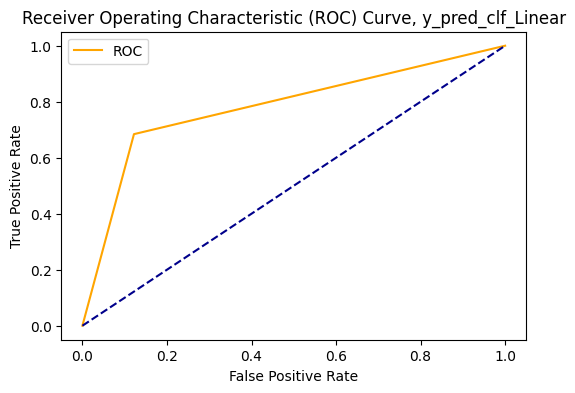

AUC: 0.673941


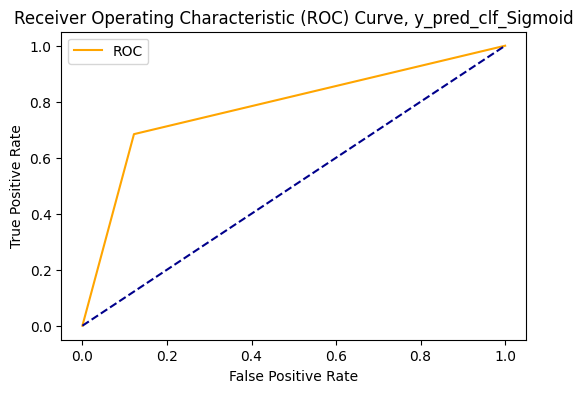

AUC: 0.673941


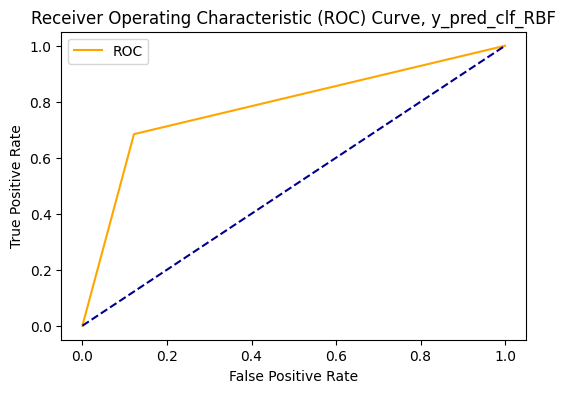

AUC: 0.673941


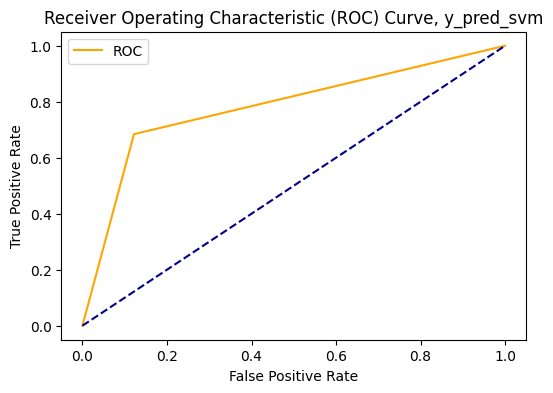

In [260]:
# Plotting ROC for the SVMs using a for loop

y_pred = [y_pred_clf_Linear,y_pred_clf_Sigmoid,y_pred_clf_RBF,y_pred_svm]
models_name=[clf_Linear, clf_Sigmoid, clf_RBF, clf_svm]


# ROC CURVE (RECEIVER OPERATING CHARACTERISTIC)
for i, y_pred in enumerate([y_pred_clf_Linear, y_pred_clf_Sigmoid, y_pred_clf_RBF, y_pred_svm]):
    plt.figure(figsize=(6, 4))
    auc_mod3 = roc_auc_score(y_test, y_pred)
    print('AUC: %f' %auc_mod2)

    fpr, tpr, _ = roc_curve(y_test, y_pred_ann3)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
     # Get the variable name dynamically
    var_name = [name for name, val in locals().items() if val is y_pred][0]
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve, {var_name}')
    plt.legend()
    plt.show()


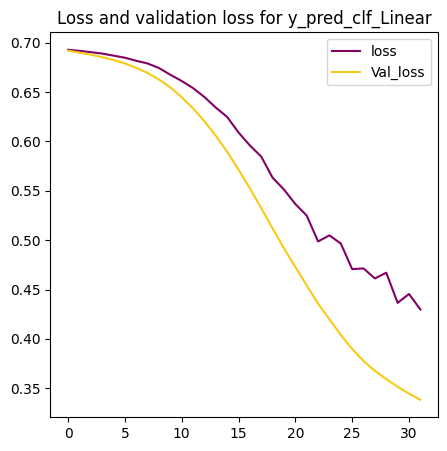

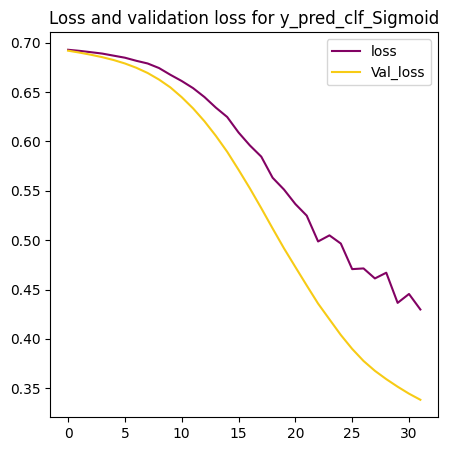

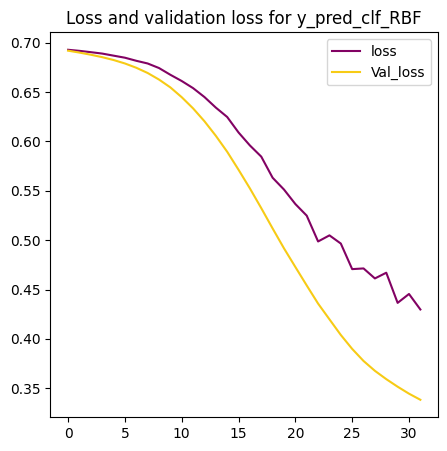

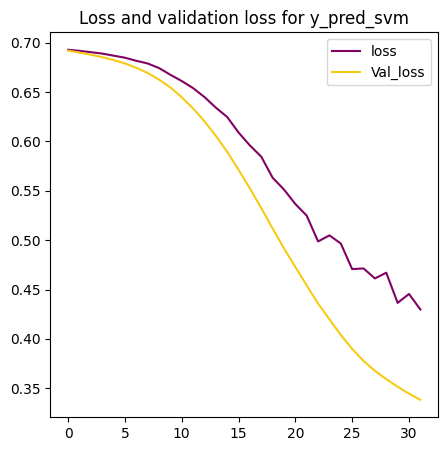

In [263]:
# PLotting Loss and validation loss for the SVMs using a for loop
for i, y_pred in enumerate([y_pred_clf_Linear, y_pred_clf_Sigmoid, y_pred_clf_RBF, y_pred_svm]):
    plt.figure(figsize=(5,5))
    plt.plot(history2.history['loss'], label = 'loss')
    plt.plot(history2.history['val_loss'], label ='Val_loss')
    var_name = [name for name, val in locals().items() if val is y_pred][0]
    plt.title(f'Loss and validation loss for {var_name}')
    plt.legend()
    plt.show()

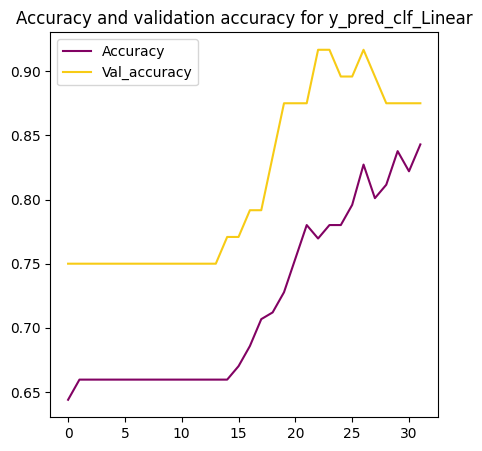

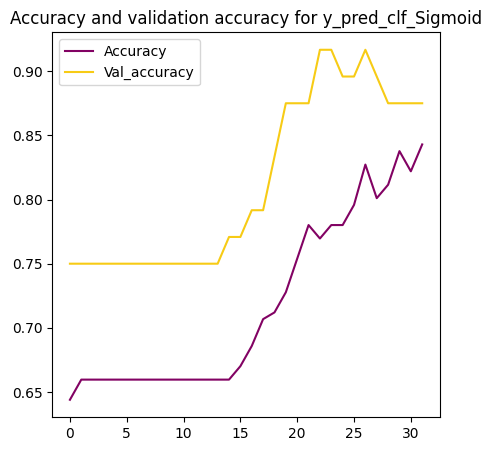

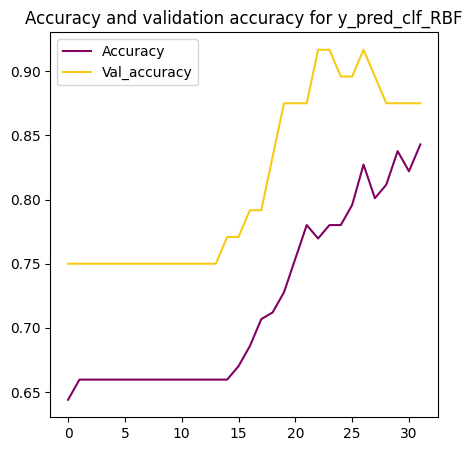

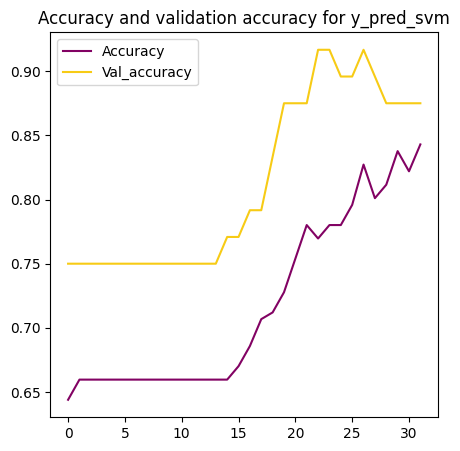

In [264]:
# Plotting accuracy and validation accuracy for the SVMs using a for loop
for i, y_pred in enumerate([y_pred_clf_Linear, y_pred_clf_Sigmoid, y_pred_clf_RBF, y_pred_svm]):
    plt.figure(figsize=(5,5))
    plt.plot(history2.history['accuracy'], label = 'Accuracy')
    plt.plot(history2.history['val_accuracy'], label ='Val_accuracy')
     # Get the variable name dynamically
    var_name = [name for name, val in locals().items() if val is y_pred][0]
    plt.title(f'Accuracy and validation accuracy for {var_name}')
    plt.legend()
    plt.show()

#### 10. Comparing the models by confusion matrix

In [ ]:
# Confusion matrix for model (3 layers ANN)
cm=confusion_matrix(y_test, y_pred_ann)


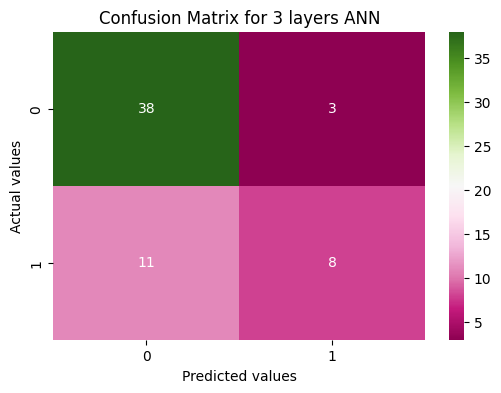

In [236]:
# Plotting confusion matrix for model
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ann_2), annot=True, cmap="PiYG")
plt.title(f'Confusion Matrix for 3 layers ANN')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
# Confusion matrix for model2 (2 layers ANN)
cm2=confusion_matrix(y_test, y_pred_ann_2)

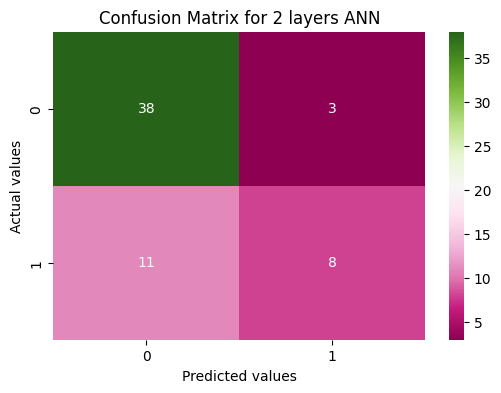

In [235]:
# Plotting confusion matrix for model2
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ann_2), annot=True, cmap="PiYG")
plt.title(f'Confusion Matrix for 2 layers ANN')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()


In [233]:
# Confusion matrix for model3
cm3=confusion_matrix(y_test, y_pred_ann3)

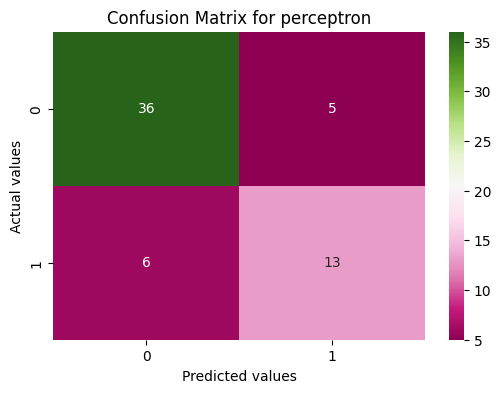

In [234]:
# Plotting confusion matrix for model3
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ann3), annot=True, cmap="PiYG")
plt.title(f'Confusion Matrix for perceptron')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()


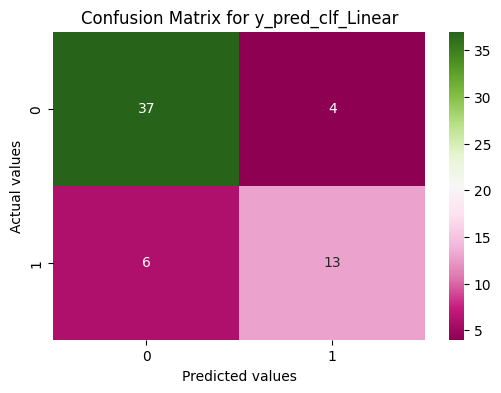

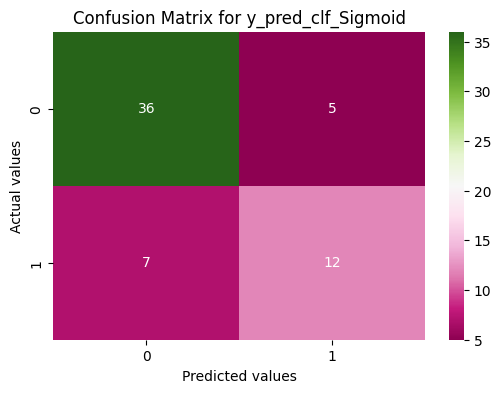

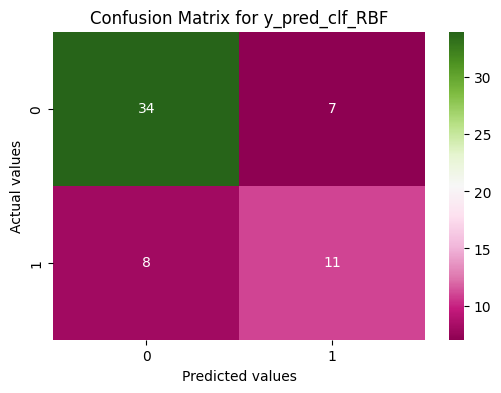

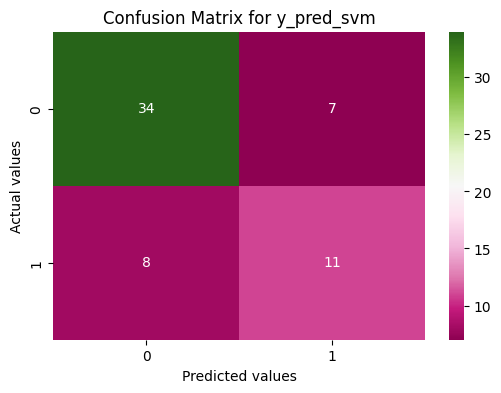

In [189]:
# EVALUATING THE SVM MODELS BY CONFUSION MATRIX, using a for loop for the visualisation

# CONFUSION MATRIX
# The confusion matrix is an N x N table (where N is the number of classes) that contains the number of correct and incorrect predictions of the classification model.
y_pred = [y_pred_clf_Linear,y_pred_clf_Sigmoid,y_pred_clf_RBF,y_pred_svm]
models_name=[clf_Linear, clf_Sigmoid, clf_RBF, clf_svm]

for i, y_pred in enumerate([y_pred_clf_Linear, y_pred_clf_Sigmoid, y_pred_clf_RBF, y_pred_svm]):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="PiYG")
    # Get the variable name dynamically
    var_name = [name for name, val in locals().items() if val is y_pred][0]
    plt.title(f'Confusion Matrix for {var_name}')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.show()
    # print sums of correct predictions, false positives and false negatives

#### 11. Comparing the models by accuracy, recall, precision, f1_score

In [190]:
# Creating a function to compare different model by accuracy and recall

def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred> 0.5, 1, 0)
    Accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
    Recall = round(recall_score(y_test, y_pred), 2)
    Precision = round(precision_score(y_test, y_pred), 2)
    F1_score = round(f1_score(y_test, y_pred), 2)
    return pd.DataFrame([Accuracy, Recall, Precision, F1_score], index=['Accuracy', 'Recall', 'Precision','F1_score'], columns=[model_name])

#accuracy = round((accuracy_score(y_test, y_pred_ann)),2)
#print("Accuracy:", accuracy)

In [196]:
# Applying the model_evaluation function to all the models 

layers_3 = model_evaluation(model, X_test, y_test, '3 layers')
layers_2 = model_evaluation(model2, X_test, y_test, '2 layers')
perceptron = model_evaluation(model3, X_test, y_test, 'Perceptron')
clf_linear = model_evaluation(clf_Linear, X_test, y_test, 'SVM(linear)')
clf_sigmoid = model_evaluation(clf_Sigmoid, X_test, y_test, 'SVM(sigmoid)')
clf_rbf = model_evaluation(clf_RBF, X_test, y_test, 'SVM(RBF)')
clf__svm = model_evaluation(clf_svm, X_test, y_test, 'SVM(SVC)')

# Creating a data frame with the accuracy and recall of each considered model
Evaluation_df = pd.concat([layers_3, layers_2, perceptron, clf_linear, clf_sigmoid, clf_rbf, clf__svm], axis=1)
print(Evaluation_df)

2/2 [==============================] - 0s 3ms/step


           3 layers  2 layers  Perceptron  SVM(linear)  SVM(sigmoid)  \
Accuracy       0.77      0.80        0.82         0.83          0.80   
Recall         0.42      0.58        0.68         0.68          0.63   
Precision      0.73      0.73        0.72         0.76          0.71   
F1_score       0.53      0.65        0.70         0.72          0.67   

           SVM(RBF)  SVM(SVC)  
Accuracy       0.75      0.75  
Recall         0.58      0.58  
Precision      0.61      0.61  
F1_score       0.59      0.59  


In [254]:
# Applying the evaluation function to all the model with a for loop
models = [model, model2, model3, clf_Linear, clf_Sigmoid, clf_RBF, clf_svm]
model_names = ['2 layers', '1 layer', 'Perceptron', 'SVM(linear)', 'SVM(sigmoid)', 'SVM(RBF)', 'SVM(SVC)']

evaluation_results = []

for model_obj, model_name in zip(models, model_names):
    result = model_evaluation(model_obj, X_test, y_test, model_name)
    evaluation_results.append(result)

# Concatenate the evaluation results into a single DataFrame
Evaluation_df = pd.concat(evaluation_results, axis=1)
print(Evaluation_df)

2/2 [==============================] - 0s 3ms/step


           2 layers  1 layer  Perceptron  SVM(linear)  SVM(sigmoid)  SVM(RBF)  \
Accuracy       0.77     0.80        0.82         0.83          0.80      0.75   
Recall         0.42     0.58        0.68         0.68          0.63      0.58   
Precision      0.73     0.73        0.72         0.76          0.71      0.61   
F1_score       0.53     0.65        0.70         0.72          0.67      0.59   

           SVM(SVC)  
Accuracy       0.75  
Recall         0.58  
Precision      0.61  
F1_score       0.59  


In [255]:
# Print the DataFrame as a nicely formatted table
from tabulate import tabulate

print(tabulate(Evaluation_df, headers='keys', tablefmt='fancy_grid'))

╒═══════════╤════════════╤═══════════╤══════════════╤═══════════════╤════════════════╤════════════╤════════════╕
│           │   2 layers │   1 layer │   Perceptron │   SVM(linear) │   SVM(sigmoid) │   SVM(RBF) │   SVM(SVC) │
╞═══════════╪════════════╪═══════════╪══════════════╪═══════════════╪════════════════╪════════════╪════════════╡
│ Accuracy  │       0.77 │      0.8  │         0.82 │          0.83 │           0.8  │       0.75 │       0.75 │
├───────────┼────────────┼───────────┼──────────────┼───────────────┼────────────────┼────────────┼────────────┤
│ Recall    │       0.42 │      0.58 │         0.68 │          0.68 │           0.63 │       0.58 │       0.58 │
├───────────┼────────────┼───────────┼──────────────┼───────────────┼────────────────┼────────────┼────────────┤
│ Precision │       0.73 │      0.73 │         0.72 │          0.76 │           0.71 │       0.61 │       0.61 │
├───────────┼────────────┼───────────┼──────────────┼───────────────┼────────────────┼──────────

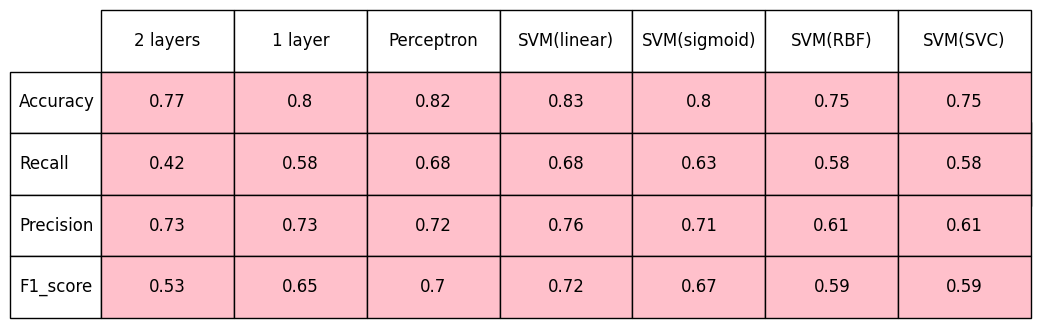

In [256]:
# TRYING TO CREATE A NICE TABLE TO PUT ON THE SLIDE WITHOUT HAVING TO REWRITE ALL THE VALUES IN A CANVA CREATED TABLE
# To do: figure out a way to name the rows efficiently, I still had to crop the table on Canva. 

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Hide the axes
ax.axis('off')

# Plot the table
table = ax.table(cellText=Evaluation_df.values, colLabels=Evaluation_df.columns, loc='center')

table = ax.table(cellText=Evaluation_df.values,
                 colLabels=Evaluation_df.columns,
                 rowLabels=Evaluation_df.index,
                 loc='center',
                 cellLoc='center',
                 cellColours=[['pink']*len(Evaluation_df.columns)]*len(Evaluation_df),
                 bbox=[0, 0, 1, 1])

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjust the font size and padding
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Increase cell padding

# Save the table as an image
plt.savefig('table_image.png')

# Show the table
plt.show()